# **1.Introduction**

Importing necessary libraries

In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import missingno as mn # for missing values visualization
from wordcloud import WordCloud as wc # for most highlighted words visualization
from wordcloud import STOPWORDS as sw # this will help ignoring english stop words in string value
from sklearn.preprocessing import StandardScaler # for stardardizing the data to the normal scale
from sklearn.model_selection import train_test_split # for splitting data into train and test
from sklearn.tree import DecisionTreeClassifier # Decision Tree model classifier
from sklearn.ensemble import RandomForestClassifier # RandomForest model classification
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.metrics import classification_report,confusion_matrix # classification report purposes


import warnings
warnings.filterwarnings("ignore")

# **Loading KDDTrain+ data**

Dataset Feature names

In [4]:
col_names = np.array(["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate", "class", 'difficulty level'])

In [5]:
train_df = pd.read_csv("./KDDTest+.txt", names = col_names)
train_df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


# 2. Exploratory Data Analysis (EDA)
Basic information about train_df along with its datatype

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

**Checking missing data in train_df DataFrame**

In [7]:
train_df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [8]:
test_df = pd.read_csv("./KDDTest+.txt", names = col_names)
test_df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

**Missing data information in test_df DataFrame**

In [10]:
test_df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [11]:
train_df['class'].unique()

array(['neptune', 'normal', 'saint', 'mscan', 'guess_passwd', 'smurf',
       'apache2', 'satan', 'buffer_overflow', 'back', 'warezmaster',
       'snmpgetattack', 'processtable', 'pod', 'httptunnel', 'nmap', 'ps',
       'snmpguess', 'ipsweep', 'mailbomb', 'portsweep', 'multihop',
       'named', 'sendmail', 'loadmodule', 'xterm', 'worm', 'teardrop',
       'rootkit', 'xlock', 'perl', 'land', 'xsnoop', 'sqlattack',
       'ftp_write', 'imap', 'udpstorm', 'phf'], dtype=object)

In [12]:
train_df['difficulty level'].unique()

array([21, 15, 11,  7,  9, 18, 14, 20, 17,  1, 19, 12, 13,  3,  8,  0, 16,
       10,  2,  5,  6,  4], dtype=int64)

**class label data sizes in dataset**

In [13]:
classLabel_counts = train_df.groupby(['class']).size()
classLabel_counts

class
apache2             737
back                359
buffer_overflow      20
ftp_write             3
guess_passwd       1231
httptunnel          133
imap                  1
ipsweep             141
land                  7
loadmodule            2
mailbomb            293
mscan               996
multihop             18
named                17
neptune            4657
nmap                 73
normal             9711
perl                  2
phf                   2
pod                  41
portsweep           157
processtable        685
ps                   15
rootkit              13
saint               319
satan               735
sendmail             14
smurf               665
snmpgetattack       178
snmpguess           331
sqlattack             2
teardrop             12
udpstorm              2
warezmaster         944
worm                  2
xlock                 9
xsnoop                4
xterm                13
dtype: int64

**Feature "class" labels percentage with respect to size of train_df**

In [14]:
per_classLabels = classLabel_counts/train_df.shape[0]*100
per_classLabels

class
apache2             3.269163
back                1.592441
buffer_overflow     0.088715
ftp_write           0.013307
guess_passwd        5.460433
httptunnel          0.589957
imap                0.004436
ipsweep             0.625444
land                0.031050
loadmodule          0.008872
mailbomb            1.299681
mscan               4.418027
multihop            0.079844
named               0.075408
neptune            20.657381
nmap                0.323811
normal             43.075763
perl                0.008872
phf                 0.008872
pod                 0.181867
portsweep           0.696416
processtable        3.038502
ps                  0.066537
rootkit             0.057665
saint               1.415011
satan               3.260291
sendmail            0.062101
smurf               2.949787
snmpgetattack       0.789567
snmpguess           1.468240
sqlattack           0.008872
teardrop            0.053229
udpstorm            0.008872
warezmaster         4.187367
worm    

**Class label percentages represented in graph**

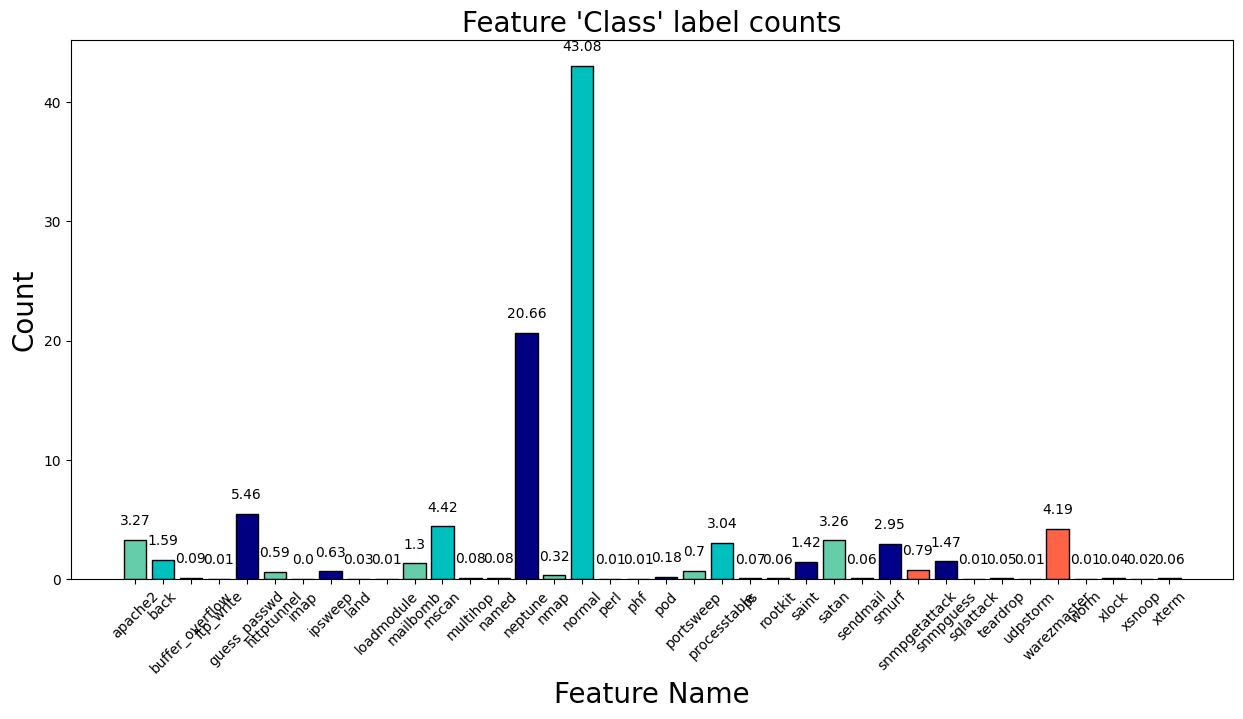

In [15]:
fig = plt.figure(figsize = (15,7))
r_ = [round(each, 2) for each in per_classLabels.values]
ax = fig.add_subplot(111)
ax.bar(per_classLabels.index, per_classLabels.values, color = ["mediumaquamarine", 'c', 'darkblue', 'tomato', 'navy'], edgecolor = 'black')
ax.set_xticklabels(per_classLabels.index, rotation = 45)
ax.set_xlabel("Feature Name", fontsize = 20)
ax.set_ylabel("Count", fontsize = 20)
ax.set_title("Feature 'Class' label counts", fontsize = 20)

for i in range(len(per_classLabels.values)):
    plt.annotate(str(r_[i]), xy=(per_classLabels.index[i],r_[i]+1), ha='center', va='bottom')

**Pie Chart: Difficulty levels percentages**

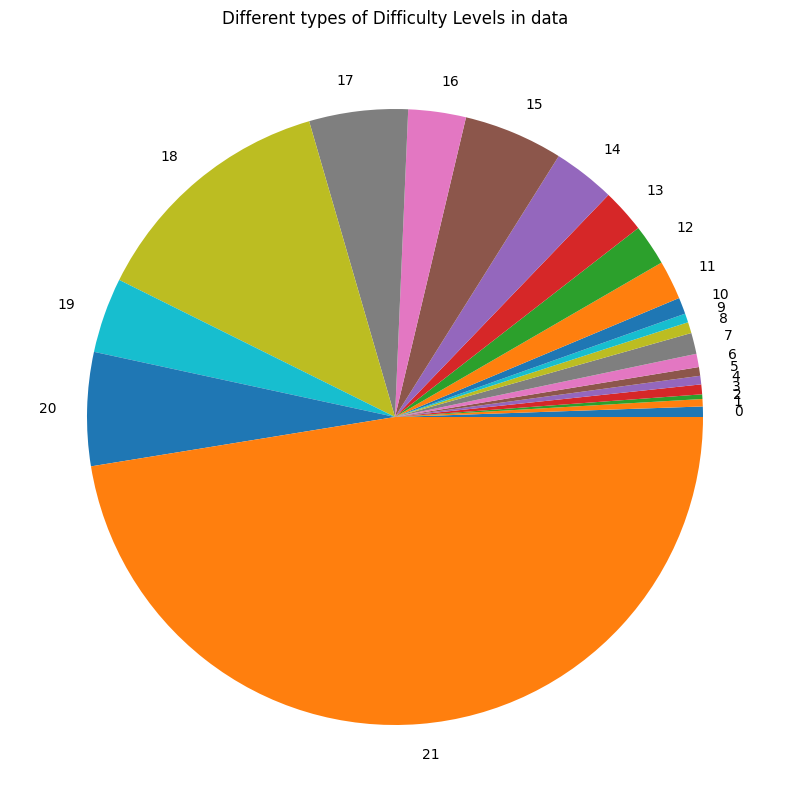

In [16]:
group_data = train_df.groupby('difficulty level').size()
plt.figure(figsize = (16,10))
group_data.plot(kind='pie')
plt.title("Different types of Difficulty Levels in data")
plt.ylabel("")
plt.show()

# 3. Preprocessing, EDA and Transformation of data
**Categorizing class labels data into 4 different groups: Dos (Denial of service), Probe (probe attacks), R2L (Remote to Local) and U2R (User to Root)**

In [17]:
train_df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


**Function helps to classify different class labels into attack_types**

In [18]:
Dos = ['land','neptune','smurf','pod','back','teardrop']
Probe = ['portsweep','ipsweep','satan','nmap']
U2R = ['buffer_overflow','loadmodule','perl','rootkit']

def encode_attack(vec):
    if vec in Dos:
        return "Dos"
    elif vec in Probe:
        return "Probe";
    elif vec in U2R:
        return "U2R"
    elif vec == "normal":
        return "normal"
    else:
        return "R2L"

**Creating new variable called "attack_type" where it classified different "class" labels to Dos, Probe, U2R, R2L and Normal**

In [19]:
train_df['attack_type'] = train_df['class'].apply(encode_attack)
train_df.iloc[:10, -5:]

,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty level,attack_type
0,1.00,1.00,neptune,21,Dos
1,1.00,1.00,neptune,21,Dos
2,0.00,0.00,normal,21,normal
3,0.00,0.00,saint,15,R2L
4,0.83,0.71,mscan,11,R2L
5,0.00,0.00,normal,21,normal
6,0.72,0.04,normal,21,normal
7,0.02,0.02,guess_passwd,15,R2L
8,0.00,0.00,normal,21,normal
9,0.00,0.00,guess_passwd,7,R2L


**Different attack types data sizes**

In [20]:
train_df.groupby('attack_type').size()

attack_type
Dos       5741
Probe     1106
R2L       5949
U2R         37
normal    9711
dtype: int64

**Percentage of data hold by different attack types**

In [21]:
percent_data = (train_df.groupby('attack_type').size())/train_df.shape[0] * 100
percent_data

attack_type
Dos       25.465756
Probe      4.905962
R2L       26.388396
U2R        0.164123
normal    43.075763
dtype: float64

**Amount of different attack types hold the data**

graph represents that "Normal" data holds 53.4%, "Dos" hold 36.46%, "Probe" attack type hold 9.2% of data and rest "R2L" and "U2R" are less than 1% data holds.

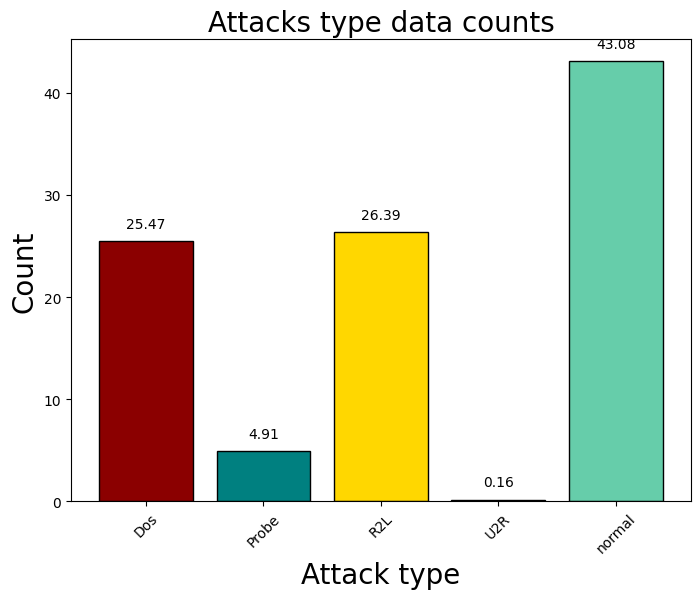

In [22]:
fig = plt.figure(figsize = (8,6))
r_ = [round(each, 2) for each in percent_data.values]
ax = fig.add_subplot(111)
ax.bar(percent_data.index, percent_data.values, color = ['darkred', 'teal', 'gold', 'lightseagreen', "mediumaquamarine"], edgecolor = 'black')
ax.set_xticklabels(percent_data.index, rotation = 45)
ax.set_xlabel("Attack type", fontsize = 20)
ax.set_ylabel("Count", fontsize = 20)
ax.set_title("Attacks type data counts", fontsize = 20)

for i in range(len(percent_data.values)):
    plt.annotate(str(r_[i]), xy=(percent_data.index[i],r_[i]+1), ha='center', va='bottom')

**Pie chart: Different types of attack types in data**

In the dataset, "Normal" data holds 43.08%, "Dos" hold 26.39%, "Probe" attack type hold 4.91% of data and rest "R2L" and "U2R" are less than 1% data holds.


**Different Protocol types**

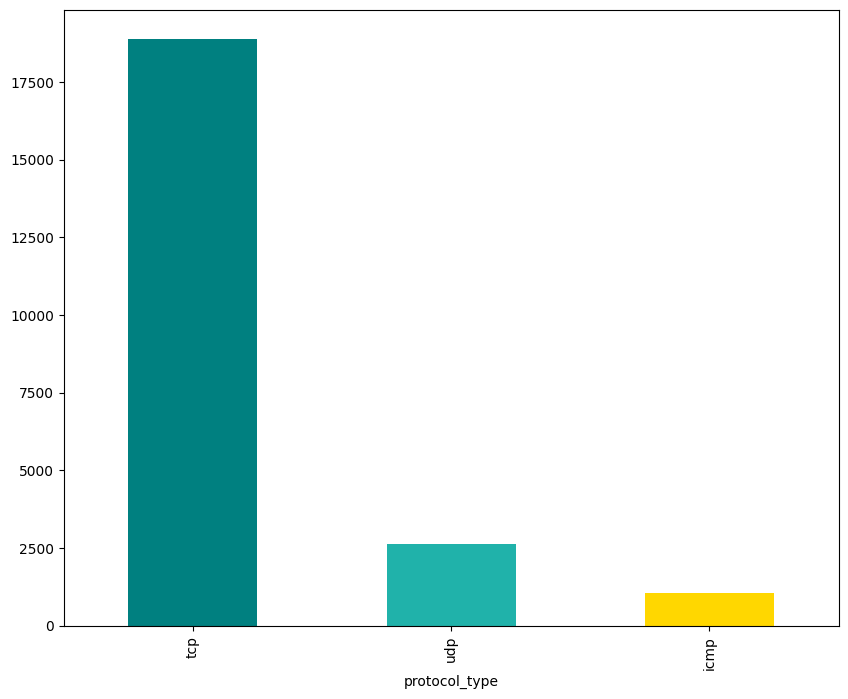

In [23]:
plt.subplots(figsize=(10,8))
train_df['protocol_type'].value_counts(normalize = True)
train_df['protocol_type'].value_counts(dropna = False).plot.bar(color=['teal', 'lightseagreen', 'gold', 'olive'])
plt.show()

**Different types of Services in Data**

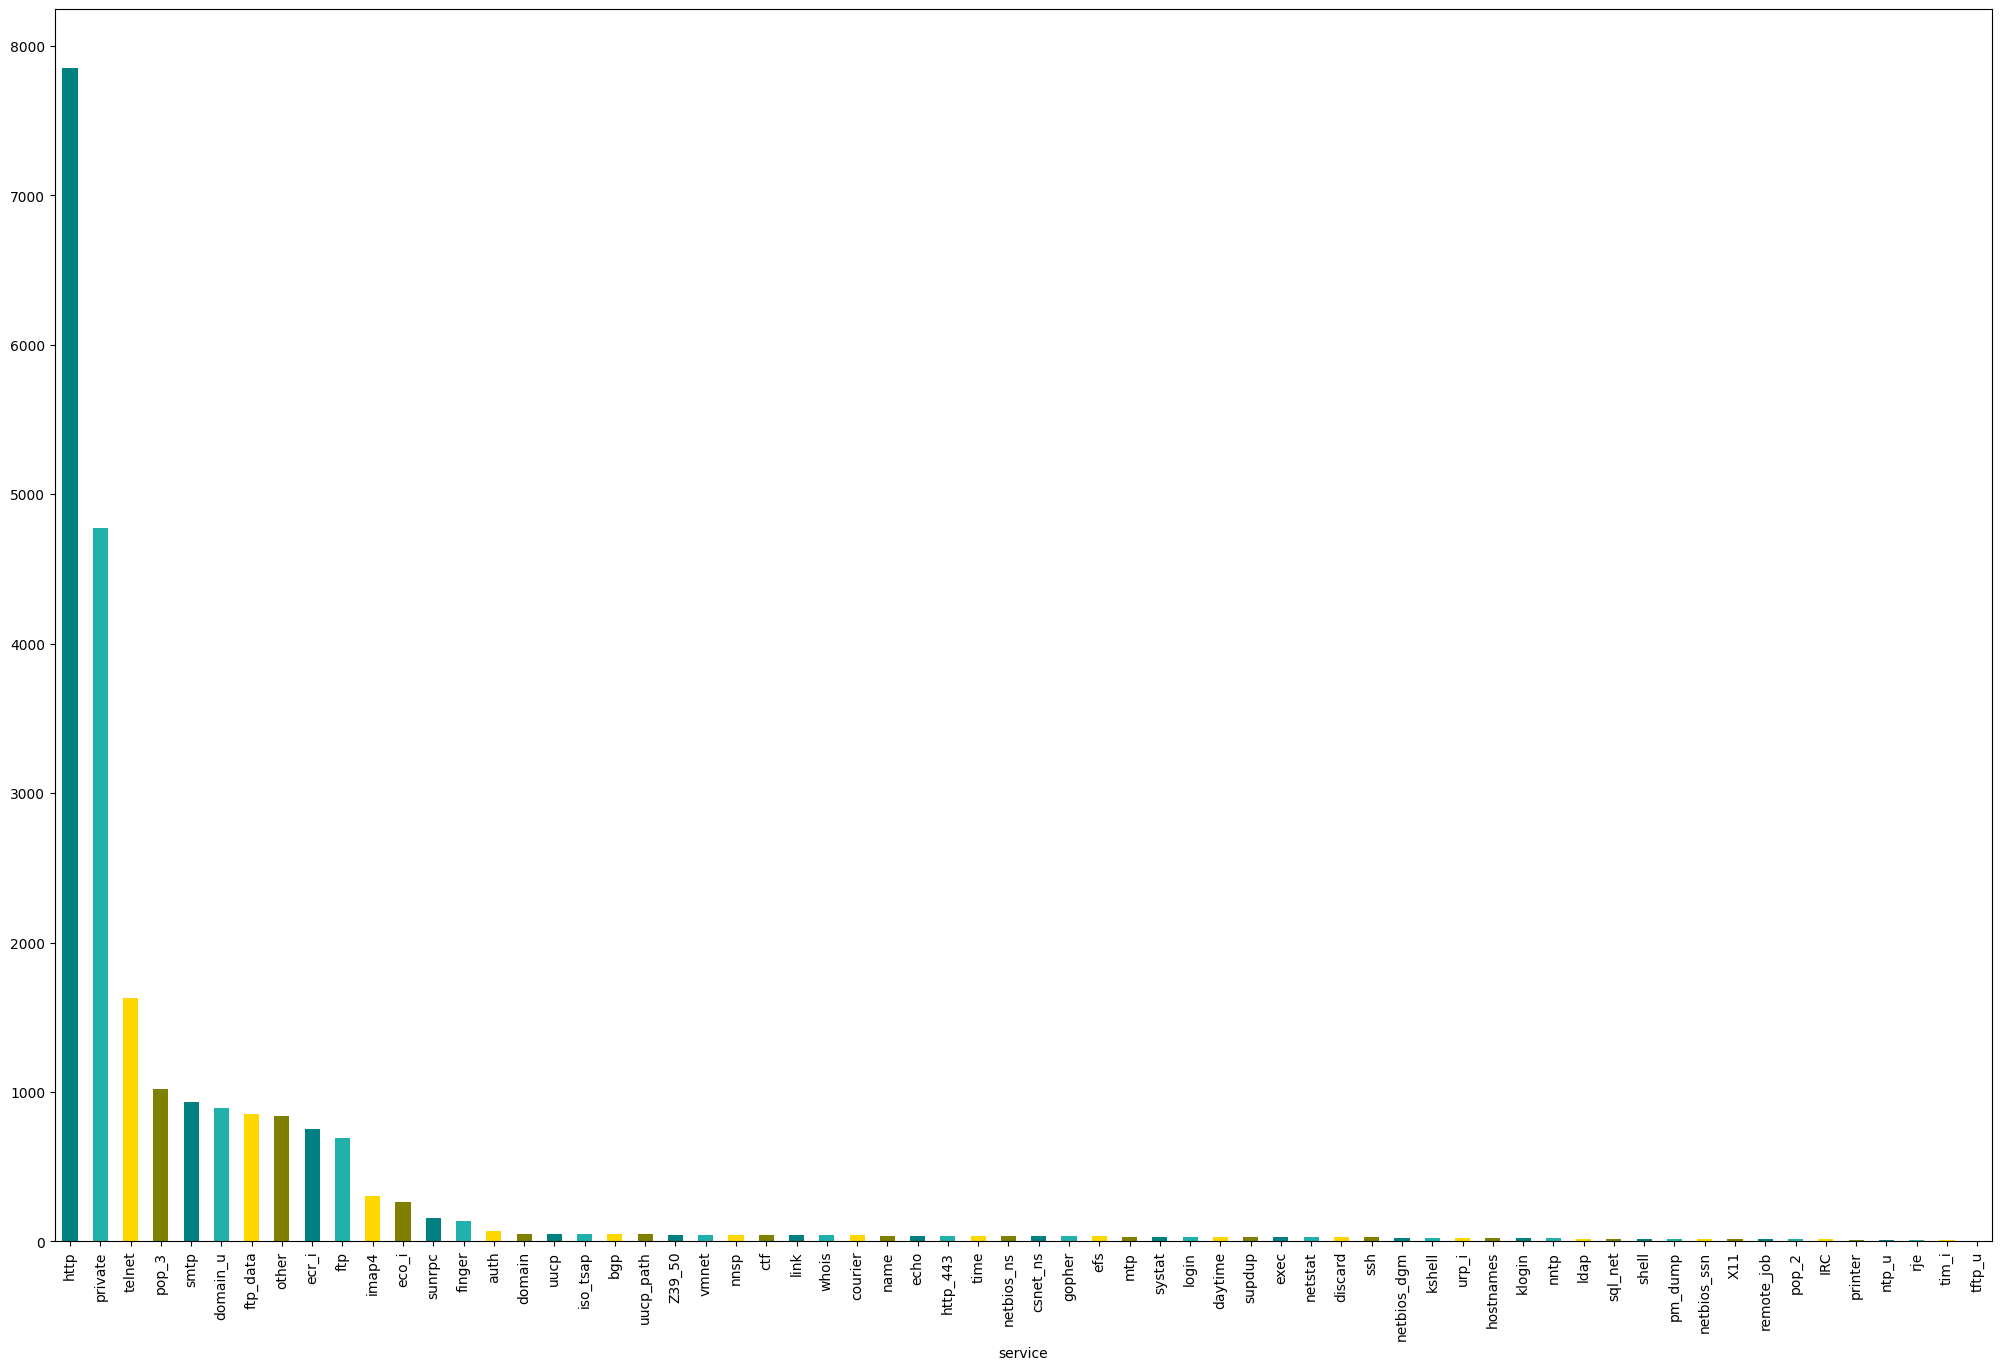

In [24]:
plt.subplots(figsize=(25,16))
train_df['service'].value_counts(normalize = True)
train_df['service'].value_counts(dropna = False).plot.bar(color=['teal', 'lightseagreen', 'gold', 'olive'])
plt.show()

In the dataset, "http" requests are high in nature when compared to "private" which is approximately half of "http" requests. Rest of all requests are hold 0 to 10% of whole data.

**Different types of Flags in data**

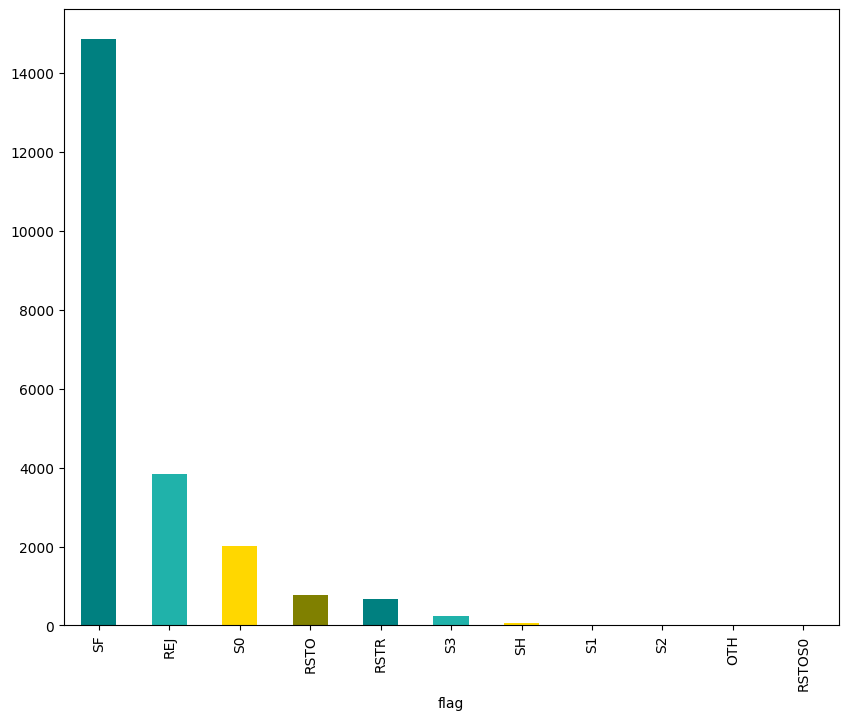

In [25]:
plt.subplots(figsize=(10,8))
train_df['flag'].value_counts(normalize = True)
train_df['flag'].value_counts(dropna = False).plot.bar(color=['teal', 'lightseagreen', 'gold', 'olive'])
plt.show()

More of "SF", "S0" and "REJ" flags observed in dataset

**Correlation between all numerical variables in dataset**


Using Heatmap visualization technique, correlation (associations) coefficients between numerical variables are shown in below heatmap plot.

In [26]:
train_df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty level,attack_type
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21,Dos
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21,Dos
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15,R2L
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11,R2L


In [27]:
numerical_cols = [one for each,one in zip(list(train_df.dtypes),train_df.dtypes.index)  if each == 'int64' or each == 'float64']
numerical_cols

['duration',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'difficulty level']

There are different types of flags noted in "flag" variable. The above represented graph indicates that "OTH", "RSTOS0", "RSTR" and "SH" flags are highly dependency on Probe, "REJ", "RSTO" and "S0" flags are on Dos and S1, S2, S3 & SF on Normal. Rest R2L, U2R are slightly influenced by all of the flags.

**Different protocols dependencies on attack types**

<Figure size 1000x800 with 0 Axes>

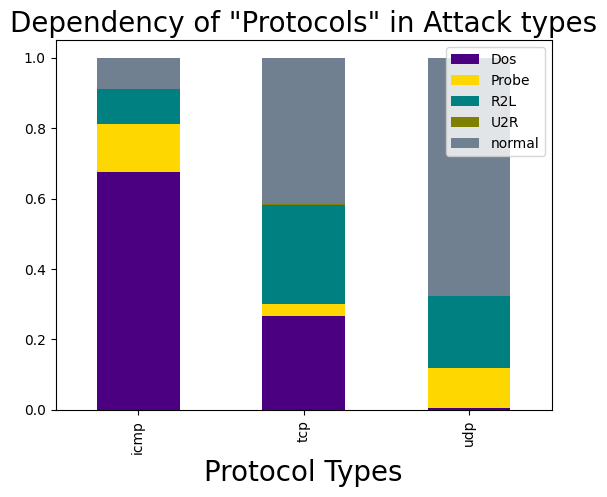

In [28]:
fig = plt.figure(figsize = (10,8))
avg_pro = pd.crosstab(train_df['protocol_type'], train_df['attack_type'])
avg_pro.div(avg_pro.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, color = ['indigo', 'gold', 'teal', 'olive', 'slategrey'])

plt.title('Dependency of "Protocols" in Attack types', fontsize = 20)
plt.xlabel('Protocol Types', fontsize = 20)
plt.legend()
plt.show()

There are different types of Protocols noted in "protocol_type" variable. The above represented graph indicates that "icmp" protocol is much influencing Probe and slightly on Dos attack types. Where as, "tcp" is much influencing or dependency on Dos attack type. "udp" is high on Normal base.

**Different services type dependencies on attack type**

<Figure size 1500x800 with 0 Axes>

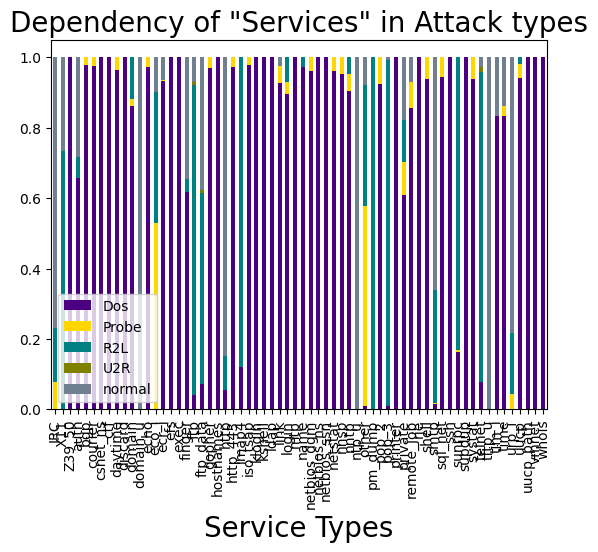

In [29]:
fig = plt.figure(figsize = (15,8))
avg_pro = pd.crosstab(train_df['service'], train_df['attack_type'])
avg_pro.div(avg_pro.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, color = ['indigo', 'gold', 'teal', 'olive', "slategrey"])

plt.title('Dependency of "Services" in Attack types', fontsize = 20)
plt.xlabel('Service Types', fontsize = 20)
plt.legend()
plt.show()

There are different types of Services noted in "service" variable. The above represented graph indicates most of the services impacting on Dos compared to Probe. Only few slightly impacting R2L and U2R

**Different difficulty level dependencies on Attack types**

<Figure size 1000x800 with 0 Axes>

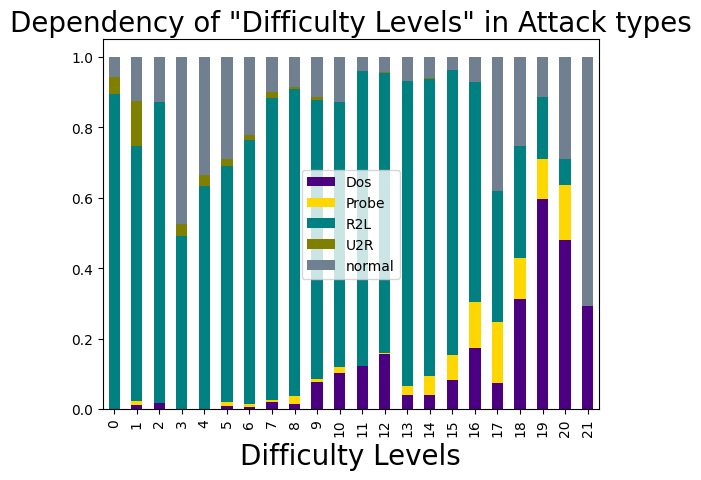

In [30]:
fig = plt.figure(figsize = (10,8))
avg_pro = pd.crosstab(train_df['difficulty level'], train_df['attack_type'])
avg_pro.div(avg_pro.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, color = ['indigo', 'gold', 'teal', 'olive', "slategrey"])

plt.title('Dependency of "Difficulty Levels" in Attack types', fontsize = 20)
plt.xlabel('Difficulty Levels', fontsize = 20)
plt.legend()
plt.show()

There are different types of difficulty levels noted in "difficulty level" variable. The above represented graph indicates that when difficulty level is increasing their impact is more on Dos and Probe compared to R2L and U2R. Probe & R2L attack types much found when difficulty levels are in starting points (0,1,2,3,4,5,6,7 and 8).

# **Sample train data**

In [31]:
train_df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty level,attack_type
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21,Dos
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21,Dos
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15,R2L
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11,R2L


**Encoding attack_type to numerical for multi-label classification**

function encoding to numerical value

In [32]:
def attack_encode(value):
    if value == 'normal':
        return 0;
    elif value == "Dos":
        return 1;
    elif value == 'Probe':
        return 2;
    elif value == 'R2L':
        return 3;
    else:
        return 4;

In [33]:
train_df['intrusion_code'] = train_df['attack_type'].apply(attack_encode)
train_df.iloc[:10, -5:]

,dst_host_srv_rerror_rate,class,difficulty level,attack_type,intrusion_code
0,1.00,neptune,21,Dos,1
1,1.00,neptune,21,Dos,1
2,0.00,normal,21,normal,0
3,0.00,saint,15,R2L,3
4,0.71,mscan,11,R2L,3
5,0.00,normal,21,normal,0
6,0.04,normal,21,normal,0
7,0.02,guess_passwd,15,R2L,3
8,0.00,normal,21,normal,0
9,0.00,guess_passwd,7,R2L,3


In [34]:
test_df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [35]:
test_df['attack_type'] = test_df['class'].apply(encode_attack)
test_df.iloc[:20, -10:]

,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty level,attack_type
0,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21,Dos
1,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21,Dos
2,0.04,0.61,0.02,0.00,0.00,0.00,0.00,normal,21,normal
3,0.00,1.00,0.28,0.00,0.00,0.00,0.00,saint,15,R2L
4,0.17,0.03,0.02,0.00,0.00,0.83,0.71,mscan,11,R2L
5,0.00,0.01,0.03,0.01,0.00,0.00,0.00,normal,21,normal
6,0.72,0.00,0.00,0.00,0.00,0.72,0.04,normal,21,normal
7,0.00,0.00,0.00,0.01,0.01,0.02,0.02,guess_passwd,15,R2L
8,0.00,0.01,0.03,0.00,0.00,0.00,0.00,normal,21,normal
9,0.08,0.02,0.00,0.00,0.00,0.00,0.00,guess_passwd,7,R2L


In [36]:
test_df['intrusion_code'] = test_df['attack_type'].apply(attack_encode)
test_df.iloc[:10, -5:]

,dst_host_srv_rerror_rate,class,difficulty level,attack_type,intrusion_code
0,1.00,neptune,21,Dos,1
1,1.00,neptune,21,Dos,1
2,0.00,normal,21,normal,0
3,0.00,saint,15,R2L,3
4,0.71,mscan,11,R2L,3
5,0.00,normal,21,normal,0
6,0.04,normal,21,normal,0
7,0.02,guess_passwd,15,R2L,3
8,0.00,normal,21,normal,0
9,0.00,guess_passwd,7,R2L,3


In [37]:
test_df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty level,attack_type,intrusion_code
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21,Dos,1
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21,Dos,1
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.02,0.0,0.0,0.00,0.00,normal,21,normal,0
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.28,0.0,0.0,0.00,0.00,saint,15,R2L,3
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11,R2L,3


**Dropping class and attack_type variables as it was encoded in "intrusion_code"**

In [38]:
train_df = train_df.drop(columns = ['class','difficulty level', 'attack_type'])
test_df = test_df.drop(columns = ['class', 'difficulty level','attack_type'])

In [39]:
train_df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion_code
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,1
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,1
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,0
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,3
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,3


In [40]:
test_df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion_code
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,1
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,1
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,0
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,3
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,3


**Numerical Columns Correlations with respect to target column**

In [41]:
# Assuming 'intrusion_code' is a categorical variable, encode it using one-hot encoding
train_df_encoded = pd.get_dummies(train_df)

# Now, compute the correlation
correlation_with_intrusion_code = train_df_encoded.corr()['intrusion_code'].sort_values(ascending=False)


In [42]:
# Select only categorical variables
category_df = train_df.select_dtypes('object')

# One hot encode the variables
dummy_df = pd.get_dummies(category_df)

# Put the label column back in the dataframe
dummy_df['intrusion_code'] = train_df['intrusion_code']

dummy_df.head(5)

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,intrusion_code
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,0
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,3
4,False,True,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,3


In [43]:
# Correlations in one-hot encoded dataframe
dummy_df.corr()['intrusion_code'].sort_values(ascending=False)

intrusion_code       1.000000
service_telnet       0.366629
service_pop_3        0.318271
service_ftp          0.225668
flag_RSTR            0.194170
                       ...   
service_ecr_i       -0.031491
protocol_type_udp   -0.090113
service_domain_u    -0.188335
flag_SF             -0.285918
service_http        -0.480386
Name: intrusion_code, Length: 79, dtype: float64

**Feature selection by dropping redudant feature:**

a) redundant features will be dropped where it has no impact on target variable

b) Highly correlated features will be involved in modeling for classification purposes

**Dropping reducant features from train and test DataFrames**

In [44]:
train_df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'intrusion_code'],
      dtype='object')

In [45]:
train_df = train_df.drop(columns=['num_outbound_cmds', 'srv_count', 'dst_bytes', 'src_bytes',
                                  'land', 'is_host_login', 'urgent', 'num_failed_logins', 'num_shells'])

test_df = test_df.drop(columns=['num_outbound_cmds', 'srv_count', 'dst_bytes', 'src_bytes',
                                  'land', 'is_host_login', 'urgent', 'num_failed_logins', 'num_shells'
                                 ])

In [46]:
train_df.tail(5)

,duration,protocol_type,service,flag,wrong_fragment,hot,logged_in,num_compromised,root_shell,su_attempted,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion_code
22539,0,tcp,smtp,SF,0,0,1,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,0
22540,0,tcp,http,SF,0,0,1,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,0
22541,0,tcp,http,SF,0,2,1,1,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,1
22542,0,udp,domain_u,SF,0,0,0,0,0,0,...,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,0
22543,0,tcp,sunrpc,REJ,0,0,0,0,0,0,...,21,0.08,0.03,0.00,0.00,0.00,0.0,0.44,1.00,3


In [47]:
test_df.head(10)

,duration,protocol_type,service,flag,wrong_fragment,hot,logged_in,num_compromised,root_shell,su_attempted,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion_code
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.00,0.00,1.00,1.00,1
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,1
2,2,tcp,ftp_data,SF,0,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,0
3,0,icmp,eco_i,SF,0,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00,3
4,1,tcp,telnet,RSTO,0,0,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,3
5,0,tcp,http,SF,0,0,1,0,0,0,...,255,1.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00,0
6,0,tcp,smtp,SF,0,0,1,0,0,0,...,28,0.11,0.72,0.00,0.00,0.00,0.00,0.72,0.04,0
7,0,tcp,telnet,SF,0,0,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,3
8,0,tcp,http,SF,0,0,1,0,0,0,...,255,1.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,0
9,0,tcp,ftp,SF,0,0,0,0,0,0,...,26,0.50,0.08,0.02,0.00,0.00,0.00,0.00,0.00,3


**One-hot encoding for train and test datasets**

In [48]:
train_df_new = pd.get_dummies(train_df)
test_df_new = pd.get_dummies(test_df)

In [49]:
print (train_df_new.shape)
print (test_df_new.shape)

(22544, 108)
(22544, 108)


In [50]:
set(train_df_new.columns).difference(set(test_df_new))

set()

**Selecting top 30 highly correlated features with respect to target variable : intrusion_code**

In [51]:
# highly_correlated = train_df_new.corr().abs()['intrusion_code'].sort_values(ascending=False)
# highly_correlated[:30]set(train_df_new.columns).difference(set(test_df_new))

highly_correlated = train_df_new.corr().abs()['intrusion_code'].sort_values(ascending=False)
print(highly_correlated[:30])

missing_columns = set(train_df_new.columns).difference(set(test_df_new.columns))
print(missing_columns)


intrusion_code              1.000000
service_http                0.480386
service_telnet              0.366629
dst_host_srv_count          0.344652
service_pop_3               0.318271
logged_in                   0.311427
flag_SF                     0.285918
dst_host_same_srv_rate      0.282610
diff_srv_rate               0.280776
dst_host_diff_srv_rate      0.241579
rerror_rate                 0.240042
srv_rerror_rate             0.230895
is_guest_login              0.227441
service_ftp                 0.225668
dst_host_rerror_rate        0.222933
dst_host_srv_rerror_rate    0.211134
duration                    0.197946
flag_RSTR                   0.194170
service_domain_u            0.188335
dst_host_count              0.174656
service_other               0.163631
flag_S3                     0.153992
service_imap4               0.152549
flag_RSTO                   0.132012
srv_serror_rate             0.126344
serror_rate                 0.125368
dst_host_srv_serror_rate    0.117150
d

**Selecting only top 30 feature set from train and test datasets for modeling**

In [52]:
list(highly_correlated[:30].index)

['intrusion_code',
 'service_http',
 'service_telnet',
 'dst_host_srv_count',
 'service_pop_3',
 'logged_in',
 'flag_SF',
 'dst_host_same_srv_rate',
 'diff_srv_rate',
 'dst_host_diff_srv_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'is_guest_login',
 'service_ftp',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'duration',
 'flag_RSTR',
 'service_domain_u',
 'dst_host_count',
 'service_other',
 'flag_S3',
 'service_imap4',
 'flag_RSTO',
 'srv_serror_rate',
 'serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_serror_rate',
 'service_sunrpc',
 'flag_REJ']

In [53]:
train_df_new = train_df_new[list(highly_correlated[:30].index)]
test_df_new = train_df_new[list(highly_correlated[:30].index)]

**Generate HeatMap visualization on newly made correlated dateset**

In [94]:
# corr_df = train_df_new.corr()[train_df_new.corr().index]
# fig, ax = plt.subplots(figsize=(20,20))
# sns.heatmap(corr_df, cmap='viridis', annot=True, annot_kws={"size": 11})
# plt.show()

In [55]:
train_df_new.shape

(22544, 30)

In [56]:
test_df_new.shape

(22544, 30)

# **4. Modeling**

# Preparing X (feature set variables) and y(target variable)

In [57]:
X= train_df_new.drop(columns = 'intrusion_code')
y = train_df_new['intrusion_code']

In [58]:
X.shape

(22544, 29)

**Standardizing data using StandardScaler**

In [59]:

# Reset column names
X.columns = range(X.shape[1])

# Fit the scaler
scaler = StandardScaler().fit(X)

# Transform the data
X = scaler.transform(X)


**Splitting data into train and test**

In [60]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=13) 

# Train Models

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Initialize classifiers
knn_classifier = KNeighborsClassifier()
dt_classifier = DecisionTreeClassifier()
svm_classifier = SVC()

# Train KNN classifier
knn_classifier.fit(X, y)
# Test KNN classifier


# Train Decision Tree 
dt_classifier.fit(X, y)



# Train SVM classifier
svm_classifier.fit(X, y)



SVC()

In [62]:
X_test = test_df_new.drop(columns = 'intrusion_code')
y_test = test_df_new['intrusion_code']

In [63]:
X_test.shape

(22544, 29)

In [64]:
y_test.shape

(22544,)

In [65]:

# Convert all column names to strings
X_test.columns = [str(col) for col in X_test.columns]

# Fit the scaler
scaler = StandardScaler().fit(X_test)

# Transform the data
X_test = scaler.transform(X_test)





In [66]:
train_df_new.shape

(22544, 30)

# Test Models

In [67]:
# KNN Classifier
knn_accuracy_test = knn_classifier.score(X_test, y_test)
print("KNN Test Accuracy:", knn_accuracy_test)

# Decision Tree Classifier
dt_accuracy_test = dt_classifier.score(X_test, y_test)
print("Decision Tree Test Accuracy:", dt_accuracy_test)

# SVM Classifier
svm_accuracy_test = svm_classifier.score(X_test, y_test)
print("SVM Test Accuracy:", svm_accuracy_test)


KNN Test Accuracy: 0.930402767920511
Decision Tree Test Accuracy: 0.9582150461320085
SVM Test Accuracy: 0.8973562810503903


KNN

In [68]:
pred1 = knn_classifier.predict(X_test)
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      9711
           1       0.95      0.89      0.92      5741
           2       0.87      0.91      0.89      1106
           3       0.96      0.91      0.93      5949
           4       0.61      0.30      0.40        37

    accuracy                           0.93     22544
   macro avg       0.86      0.80      0.82     22544
weighted avg       0.93      0.93      0.93     22544



DECISION TREE

In [69]:
pred2 = dt_classifier.predict(X_test)
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      9711
           1       0.99      0.91      0.95      5741
           2       0.96      0.96      0.96      1106
           3       0.97      0.96      0.96      5949
           4       1.00      0.95      0.97        37

    accuracy                           0.96     22544
   macro avg       0.97      0.95      0.96     22544
weighted avg       0.96      0.96      0.96     22544



SVM

In [70]:
pred3 = dt_classifier.predict(X_test)
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      9711
           1       0.99      0.91      0.95      5741
           2       0.96      0.96      0.96      1106
           3       0.97      0.96      0.96      5949
           4       1.00      0.95      0.97        37

    accuracy                           0.96     22544
   macro avg       0.97      0.95      0.96     22544
weighted avg       0.96      0.96      0.96     22544



## Binary Classification

In [71]:
binary_train = train_df_new
binary_train.head(5)

,intrusion_code,service_http,service_telnet,dst_host_srv_count,service_pop_3,logged_in,flag_SF,dst_host_same_srv_rate,diff_srv_rate,dst_host_diff_srv_rate,...,service_other,flag_S3,service_imap4,flag_RSTO,srv_serror_rate,serror_rate,dst_host_srv_serror_rate,dst_host_serror_rate,service_sunrpc,flag_REJ
0,1,False,False,10,False,0,False,0.04,0.06,0.06,...,False,False,False,False,0.00,0.0,0.0,0.0,False,True
1,1,False,False,1,False,0,False,0.00,0.06,0.06,...,False,False,False,False,0.00,0.0,0.0,0.0,False,True
2,0,False,False,86,False,0,True,0.61,0.00,0.04,...,False,False,False,False,0.00,0.0,0.0,0.0,False,False
3,3,False,False,57,False,0,True,1.00,0.00,0.00,...,False,False,False,False,0.00,0.0,0.0,0.0,False,False
4,3,False,True,86,False,0,False,0.31,0.00,0.17,...,False,False,False,True,0.12,0.0,0.0,0.0,False,False


In [72]:
binary_test = test_df_new
binary_test.head(5)

,intrusion_code,service_http,service_telnet,dst_host_srv_count,service_pop_3,logged_in,flag_SF,dst_host_same_srv_rate,diff_srv_rate,dst_host_diff_srv_rate,...,service_other,flag_S3,service_imap4,flag_RSTO,srv_serror_rate,serror_rate,dst_host_srv_serror_rate,dst_host_serror_rate,service_sunrpc,flag_REJ
0,1,False,False,10,False,0,False,0.04,0.06,0.06,...,False,False,False,False,0.00,0.0,0.0,0.0,False,True
1,1,False,False,1,False,0,False,0.00,0.06,0.06,...,False,False,False,False,0.00,0.0,0.0,0.0,False,True
2,0,False,False,86,False,0,True,0.61,0.00,0.04,...,False,False,False,False,0.00,0.0,0.0,0.0,False,False
3,3,False,False,57,False,0,True,1.00,0.00,0.00,...,False,False,False,False,0.00,0.0,0.0,0.0,False,False
4,3,False,True,86,False,0,False,0.31,0.00,0.17,...,False,False,False,True,0.12,0.0,0.0,0.0,False,False


# Binary Labels

In [73]:
# changing attack labels into two categories 'normal' and 'abnormal'
bin_label = pd.DataFrame(binary_train.intrusion_code.map(lambda x:'normal' if x==0 else 'abnormal'))
bin_label

,intrusion_code
0,abnormal
1,abnormal
2,normal
3,abnormal
4,abnormal
...,...
22539,normal
22540,normal
22541,abnormal
22542,normal


In [74]:
# creating a dataframe with binary labels (normal,abnormal)
bin_data = binary_train.copy()
bin_data['intrusion_code'] = bin_label

In [75]:
from sklearn import preprocessing
# Initialize LabelEncoder
le1 = preprocessing.LabelEncoder()

# Apply LabelEncoder to bin_label
enc_label = bin_label.apply(le1.fit_transform)

# Assign the encoded labels to a new column in bin_data
bin_data['intrusion_code'] = enc_label


In [76]:
le1.classes_

array(['abnormal', 'normal'], dtype=object)

In [77]:
np.save("le1_classes.npy",le1.classes_,allow_pickle=True)

# Data Splitting

In [78]:
X = bin_data.drop(columns=['intrusion_code'],axis=1)
Y = bin_data['intrusion_code']

In [79]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20, random_state=50)

# K Nearest Neighbor Classifier

In [80]:
# Reset column names
X_train.columns = range(X_train.shape[1])

# Fit the scaler
scaler = StandardScaler().fit(X_train)

# Transform the data
X_train = scaler.transform(X_train)

In [81]:
knn_bin=KNeighborsClassifier(n_neighbors=5)
knn_bin.fit(X_train,y_train)

KNeighborsClassifier()

In [82]:
# Reset column names
X_test.columns = range(X_test.shape[1])

# Fit the scaler
scaler = StandardScaler().fit(X_test)

# Transform the data
X_test = scaler.transform(X_test)

In [83]:
y_pred = knn_bin.predict(X_test)

In [84]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import accuracy_score

# Calculate and print evaluation metrics
print("Mean Absolute Error - ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - ", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - ", metrics.explained_variance_score(y_test, y_pred) * 100)
print("Accuracy - ", accuracy_score(y_test, y_pred) * 100)


Mean Absolute Error -  0.061654468840097586
Mean Squared Error -  0.061654468840097586
Root Mean Squared Error -  0.24830317927907727
R2 Score -  75.23519173171601
Accuracy -  93.83455311599023


In [85]:
cls_report= classification_report(y_true=y_test, y_pred=y_pred,target_names=le1.classes_)
print(cls_report)

              precision    recall  f1-score   support

    abnormal       0.92      0.97      0.95      2543
      normal       0.96      0.90      0.93      1966

    accuracy                           0.94      4509
   macro avg       0.94      0.93      0.94      4509
weighted avg       0.94      0.94      0.94      4509



# Decision Tree Classifier

In [86]:
dt_bin = DecisionTreeClassifier(random_state=123)
dt_bin.fit(X_train,y_train)

DecisionTreeClassifier(random_state=123)

In [87]:
y_pred = dt_bin.predict(X_test)

In [88]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.07429585273896651
Mean Squared Error -  0.07429585273896651
Root Mean Squared Error -  0.27257265589007
R2 Score -  69.79940946543461
Accuracy -  92.57041472610335


In [89]:
cls_report= classification_report(y_true=y_test, y_pred=y_pred,target_names=le1.classes_)
print(cls_report)

              precision    recall  f1-score   support

    abnormal       0.93      0.94      0.93      2543
      normal       0.92      0.91      0.91      1966

    accuracy                           0.93      4509
   macro avg       0.93      0.92      0.92      4509
weighted avg       0.93      0.93      0.93      4509



# Linear Support Vector Machine

In [90]:
lsvm_bin = SVC(kernel='linear',gamma='auto')
lsvm_bin.fit(X_train,y_train)

SVC(gamma='auto', kernel='linear')

In [91]:
y_pred = lsvm_bin.predict(X_test)

In [92]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.0825016633399867
Mean Squared Error -  0.0825016633399867
Root Mean Squared Error -  0.2872310278155664
R2 Score -  66.7674893160128
Accuracy -  91.74983366600134


In [93]:
cls_report= classification_report(y_true=y_test, y_pred=y_pred,target_names=le1.classes_)
print(cls_report)

              precision    recall  f1-score   support

    abnormal       0.91      0.95      0.93      2543
      normal       0.93      0.87      0.90      1966

    accuracy                           0.92      4509
   macro avg       0.92      0.91      0.92      4509
weighted avg       0.92      0.92      0.92      4509

